In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

任务一、绘制2017年6月销量前5的商品销量柱状图

In [2]:
#获取所有订单数据
all_order = pd.read_csv('processed_order.csv',encoding = 'gbk')
all_order.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017/1/1 0:53,D,已出货未退款,已提现
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017/1/1 8:45,E,已出货未退款,已提现
3,DD201708167493683507186615837,E43A6E078A04228,5.0,5.0,48g好丽友薯愿香烤原味,2017/1/1 9:05,C,已出货未退款,已提现
4,DD201708167493759548618252006,E43A6E078A04134,3.0,3.0,600ml可口可乐,2017/1/1 9:41,B,已出货未退款,已提现


In [3]:
all_order.dtypes

订单号      object
设备ID     object
应付金额    float64
实际金额    float64
商品       object
支付时间     object
地点       object
状态       object
提现       object
dtype: object

In [4]:
#提取2017年6月订单的数据
#将字符串时间转换为datetime格式
all_order['支付时间'] = pd.to_datetime(all_order['支付时间'])
#提取6月的订单
june_or_not = [i.month == 6 for i in all_order['支付时间']]
june_order = all_order.loc[june_or_not]
june_order.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
11315,DD201708167493190200943961687,E43A6E078A04228,4.5,4.5,250ml燕塘原味酸奶,2017-06-01 00:01:00,C,已出货未退款,已提现
11316,DD201708167493190206930007675,E43A6E078A04134,2.0,2.0,145ml旺仔牛奶盒装,2017-06-01 00:02:00,B,已出货未退款,已提现
11317,DD201708167493190368633848103,E43A6E078A04172,1.5,1.5,劲仔小鱼（卤香味）,2017-06-01 00:07:00,A,已出货未退款,已提现
11318,DD201708167493466235023422173,E43A6E078A04172,4.5,4.5,80g香飘飘椰果奶茶麦香味,2017-06-01 00:08:00,A,已出货未退款,已提现
11319,DD20170521150353225D2CC0CD748,E43A6E078A04172,3.0,3.0,伊利纯牛奶,2017-06-01 00:08:00,A,已出货未退款,已提现


In [5]:
#将所有商品6月的销量降序排列
june_order_group = june_order[['订单号','商品']].groupby(by = '商品')
june_order_amounts = june_order_group.count().sort_values(by = '订单号',ascending = False)
june_order_amounts.columns = ['销量']

In [6]:
june_order_amounts.head()

,销量
商品,
怡宝纯净水,657
40g双汇玉米热狗肠,240
东鹏特饮,238
脉动,235
250ml维他柠檬茶,225


In [7]:
#排前五的商品及对应销量
commodities = june_order_amounts.index[:5]
amounts = june_order_amounts['销量'][:5]

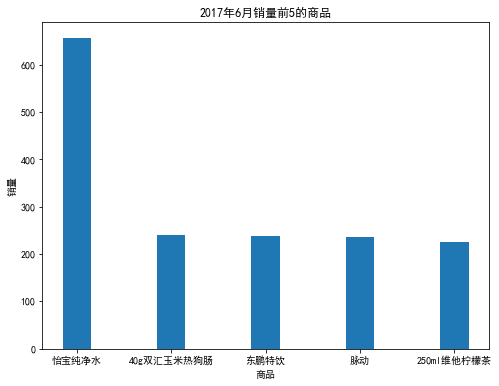

In [8]:
plt.rcParams['font.sans-serif'] = 'SimHei'#设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (8,6))
plt.bar(range(5),amounts,width = 0.3)
plt.xlabel('商品')
plt.ylabel('销量')
plt.xticks(range(5),commodities)
plt.title('2017年6月销量前5的商品')
plt.show()

任务二、绘制每台售货机每月总交易额折线图，及交易额月环比增长率柱状图

In [9]:
#以销售机A为例
order_A = pd.read_csv('task1-1A.csv',encoding = 'gbk')
order_A['支付时间'] = pd.to_datetime(order_A['支付时间'])
order_A['月份'] = [i.month for i in  order_A['支付时间']]
order_A_group = order_A[['月份','实际金额']].groupby('月份')
sell_A = order_A_group.sum()
month = sell_A.index
sell_A_amount = sell_A['实际金额']

In [31]:
machine = ['A','B','C','D','E']
for k in machine:
    #读取销售机k的数据
    exec("order_%(machine)c = pd.read_csv('task1-1%(machine)c.csv',encoding = 'gbk')"%{'machine' : k})
    #转换字符串时间为datetime格式
    exec("order_%(machine)c['支付时间'] = pd.to_datetime(order_%(machine)c['支付时间'])"%{'machine' : k})
    #根据月份对销量进行分组
    exec("order_%(machine)c['月份'] = [i.month for i in  order_%(machine)c['支付时间']]"%{'machine' : k})
    exec("order_%(machine)c_group = order_%(machine)c[['月份','实际金额']].groupby('月份')"%{'machine' : k})
    #计算每月的销量
    exec("sell_%(machine)c = order_%(machine)c_group.sum()"%{'machine' : k})
    exec("month = sell_%(machine)c.index.tolist()"%{'machine' : k})
    exec("sell_%(machine)c_amount = sell_%(machine)c['实际金额'].tolist()"%{'machine' : k})
    #计算环比增长率
    exec("ratio_%(machine)c = []"%{'machine' : k})
    for m in month:
        if(m == 1):
            continue
        exec("ratio_%(machine)c.append((sell_%(machine)c_amount[m-1]-sell_%(machine)c_amount[m-2])/sell_%(machine)c_amount[m-2])"
             %{'machine' : k})

In [72]:
print("销售机A的销量：\n",sell_A_amount)
print("销售机A的月环比增长率：\n",ratio_C)

销售机A的销量：
 [1509.6999999999998, 440.5, 914.2999999999998, 1804.4999999999998, 3385.100000000001, 6755.100000000012, 1950.4999999999993, 2236.8999999999996, 4479.5, 6292.400000000009, 5187.000000000001, 7587.100000000011]
销售机A的月环比增长率：
 [-0.5172203596464493, 0.2518939393939394, 2.260010085728694, 0.15379141787581666, 1.2717327183997447, -0.640341351715021, 0.6170128975091054, 0.5077528819613583, 0.2746937676672491, -0.10697276576871456, 0.10923882838459346]


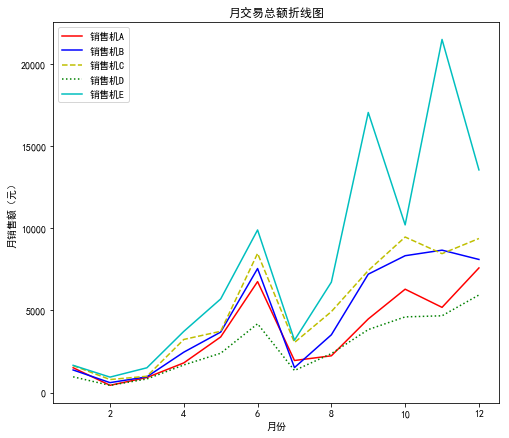

In [43]:
plt.figure(figsize = (8,7))
#月交易额折线图
plt.plot(month,sell_A_amount,'r-',
        month,sell_B_amount,'b-',
        month,sell_C_amount,'y--',
        month,sell_D_amount,'g:',
        month,sell_E_amount,'c-')
plt.legend(['销售机A','销售机B','销售机C','销售机D','销售机E'])
plt.title('月交易总额折线图')
plt.xlabel('月份')
plt.ylabel('月销售额（元）')
plt.show()
#月环比增长率柱状图

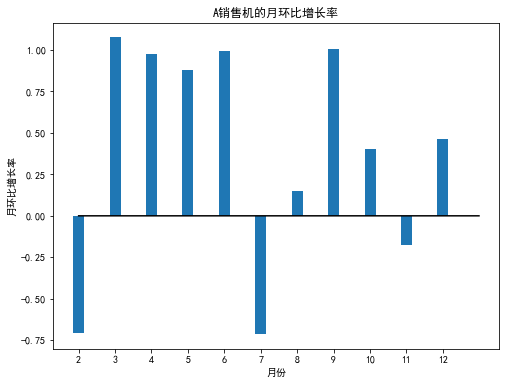

In [61]:
x = np.arange(0,11,0.01)
y = np.zeros((x.shape))
plt.rcParams['font.sans-serif'] = 'SimHei'#设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (8,6))
plt.bar(range(11),ratio_A,width = 0.3)
plt.plot(x,y,'black')
plt.xticks(range(11),range(2,13))
plt.xlabel('月份')
plt.ylabel('月环比增长率')
plt.title('A销售机的月环比增长率')
plt.show()

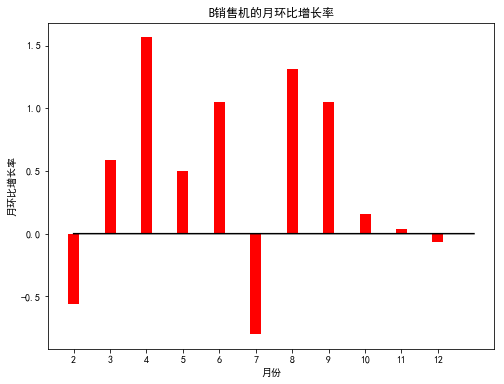

In [62]:
x = np.arange(0,11,0.01)
y = np.zeros((x.shape))
plt.rcParams['font.sans-serif'] = 'SimHei'#设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (8,6))
plt.bar(range(11),ratio_B,width = 0.3,color = 'red')
plt.plot(x,y,'black')
plt.xticks(range(11),range(2,13))
plt.xlabel('月份')
plt.ylabel('月环比增长率')
plt.title('B销售机的月环比增长率')
plt.show()

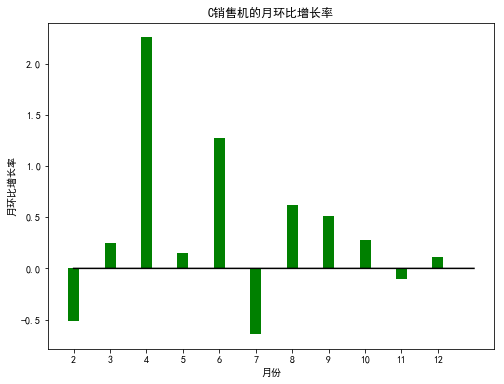

In [63]:
x = np.arange(0,11,0.01)
y = np.zeros((x.shape))
plt.rcParams['font.sans-serif'] = 'SimHei'#设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (8,6))
plt.bar(range(11),ratio_C,width = 0.3,color = 'green')
plt.plot(x,y,'black')
plt.xticks(range(11),range(2,13))
plt.xlabel('月份')
plt.ylabel('月环比增长率')
plt.title('C销售机的月环比增长率')
plt.show()

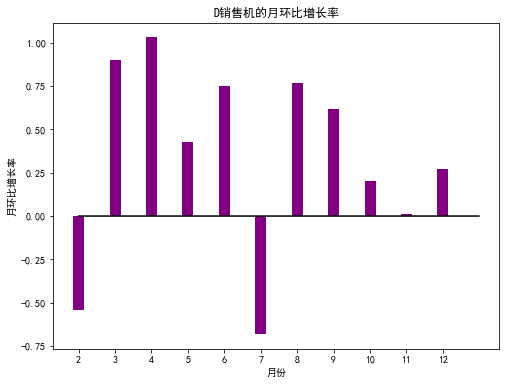

In [70]:
x = np.arange(0,11,0.01)
y = np.zeros((x.shape))
plt.rcParams['font.sans-serif'] = 'SimHei'#设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (8,6))
plt.bar(range(11),ratio_D,width = 0.3,color = 'purple')
plt.plot(x,y,'black')
plt.xticks(range(11),range(2,13))
plt.xlabel('月份')
plt.ylabel('月环比增长率')
plt.title('D销售机的月环比增长率')
plt.show()

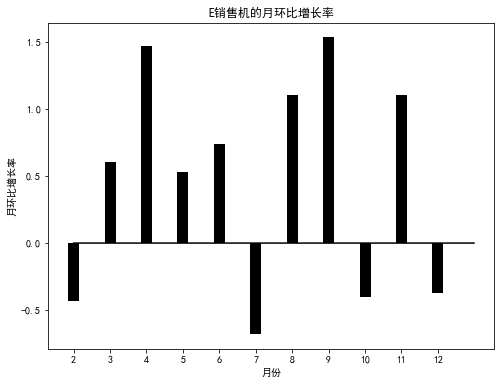

In [71]:
x = np.arange(0,11,0.01)
y = np.zeros((x.shape))
plt.rcParams['font.sans-serif'] = 'SimHei'#设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (8,6))
plt.bar(range(11),ratio_E,width = 0.3,color = 'black')
plt.plot(x,y,'black')
plt.xticks(range(11),range(2,13))
plt.xlabel('月份')
plt.ylabel('月环比增长率')
plt.title('E销售机的月环比增长率')
plt.show()

任务三、绘制每台售货机占总毛利润比例的饼图（假设饮料类毛利率为25%，非饮料类毛利率为20%）

In [73]:
#首先计算各销售机的总毛利润

In [74]:
commodity = pd.read_csv('data_2.csv',encoding = 'gbk')

In [77]:
A_lists = pd.merge(left = order_A,right = commodity)
A_lists.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,月份,大类,二级类
0,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017-01-01 01:33:00,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
1,DD201708167493867099990764535,E43A6E078A04172,1.5,1.5,40g双汇玉米热狗肠,2017-01-09 15:38:00,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2,DD20170816749300882436594455082,E43A6E078A04172,1.5,1.5,40g双汇玉米热狗肠,2017-01-09 16:22:00,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
3,DD201708167493870303785331698,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017-01-09 17:36:00,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
4,DD201708167493871004548229048,E43A6E078A04172,1.5,1.5,40g双汇玉米热狗肠,2017-01-09 17:55:00,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋


In [93]:
B_lists = pd.merge(left = order_B,right = commodity)
C_lists = pd.merge(left = order_C,right = commodity)
D_lists = pd.merge(left = order_D,right = commodity)
E_lists = pd.merge(left = order_E,right = commodity)

In [94]:
#计算A销售机的毛利润
gross_profit_A = 0
for k in range(len(A_lists)):
    order = A_lists.iloc[k]
    if order['大类'] == '非饮料':
        gross_profit_A = gross_profit_A + order['实际金额'] * 0.25
    elif order['大类'] == '饮料':
        gross_profit_A = gross_profit_A + order['实际金额'] * 0.2
print('A销售机的毛利润为：',gross_profit_A)

A销售机的毛利润为： 9436.585000000141


In [95]:
#计算其他销售机的毛利润
gross_profit_B = 0
for k in range(len(B_lists)):
    order = B_lists.iloc[k]
    if order['大类'] == '非饮料':
        gross_profit_B = gross_profit_B + order['实际金额'] * 0.25
    elif order['大类'] == '饮料':
        gross_profit_B = gross_profit_B + order['实际金额'] * 0.2

gross_profit_C = 0
for k in range(len(C_lists)):
    order = C_lists.iloc[k]
    if order['大类'] == '非饮料':
        gross_profit_C = gross_profit_C + order['实际金额'] * 0.25
    elif order['大类'] == '饮料':
        gross_profit_C = gross_profit_C + order['实际金额'] * 0.2 

gross_profit_D = 0
for k in range(len(D_lists)):
    order = D_lists.iloc[k]
    if order['大类'] == '非饮料':
        gross_profit_D = gross_profit_D + order['实际金额'] * 0.25
    elif order['大类'] == '饮料':
        gross_profit_D = gross_profit_D + order['实际金额'] * 0.2

gross_profit_E = 0
for k in range(len(E_lists)):
    order = E_lists.iloc[k]
    if order['大类'] == '非饮料':
        gross_profit_E = gross_profit_E + order['实际金额'] * 0.25
    elif order['大类'] == '饮料':
        gross_profit_E = gross_profit_E + order['实际金额'] * 0.2        

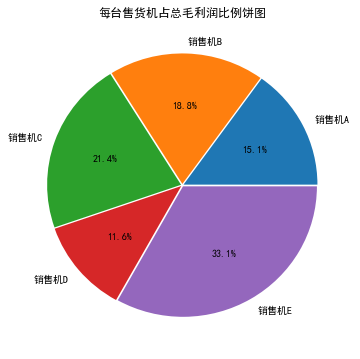

In [101]:
#绘制毛利润饼图
gross_profit = [gross_profit_A,gross_profit_B,gross_profit_C,gross_profit_D,gross_profit_E]

plt.figure(figsize = (6,6))
label = ['销售机A','销售机B','销售机C','销售机D','销售机E']
explode = [0.01,0.01,0.01,0.01,0.01]
plt.pie(gross_profit,explode = explode,labels = label,autopct = '%1.1f%%')
plt.title('每台售货机占总毛利润比例饼图')
plt.show()

任务四、绘制每月交易均值气泡图，横轴为时间，纵轴为商品的二级科目

In [104]:
all_lists = pd.merge(left = all_order,right = commodity)
month = [i.month  for i in all_lists['支付时间']]
all_lists['月份'] = month


In [105]:
all_lists.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,大类,二级类,月份
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017-01-01 00:53:00,D,已出货未退款,已提现,非饮料,饼干糕点,1
1,DD20170816749368329675770932,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017-01-02 20:58:00,D,已出货未退款,已提现,非饮料,饼干糕点,1
2,DD20170816749300229112037656709,E43A6E078A06874,4.5,4.5,68g好丽友巧克力派2枚,2017-01-03 01:53:00,E,已出货未退款,已提现,非饮料,饼干糕点,1
3,DD201708167493529849068514902,E43A6E078A04228,4.0,4.0,68g好丽友巧克力派2枚,2017-01-08 20:22:00,C,已出货未退款,已提现,非饮料,饼干糕点,1
4,DD201708167493876353091909391,E43A6E078A04228,14.0,14.0,68g好丽友巧克力派2枚,2017-01-09 21:38:00,C,已出货未退款,已提现,非饮料,饼干糕点,1


In [106]:
#根据时间和商品二级科目分组
all_lists_group = all_lists[['实际金额','月份','二级类']].groupby(by = ['月份','二级类'])

In [108]:
#根据时间和商品二级科目，计算交易额均值
amount_means = all_lists_group.mean()
amount_means.head()

实际金额
月份 二级类           
1  乳制品   5.389671
   功能饮料  4.989583
   咖啡    5.844828
   坚果炒货  6.250000
   方便速食  5.641975

In [118]:
amount_means.index.levels[1]

Index(['乳制品', '其他', '功能饮料', '咖啡', '坚果炒货', '方便速食', '果冻/龟苓膏', '果蔬饮料', '植物蛋白',
       '水', '海味零食', '碳酸饮料', '糖果/巧克力', '纸巾', '肉干/豆制品/蛋', '膨化食品', '茶饮料', '蜜饯/果干',
       '饼干糕点', '香烟'],
      dtype='object', name='二级类')

In [142]:
x = []
y = []
z = []
means_lists = amount_means['实际金额'].tolist()
for k in range(len(amount_means)):
    x.append(amount_means.index[k][0])#横轴以月为单位
    y.append(amount_means.index[k][1])#纵轴以商品二级类为单位
    z.append(means_lists[k])

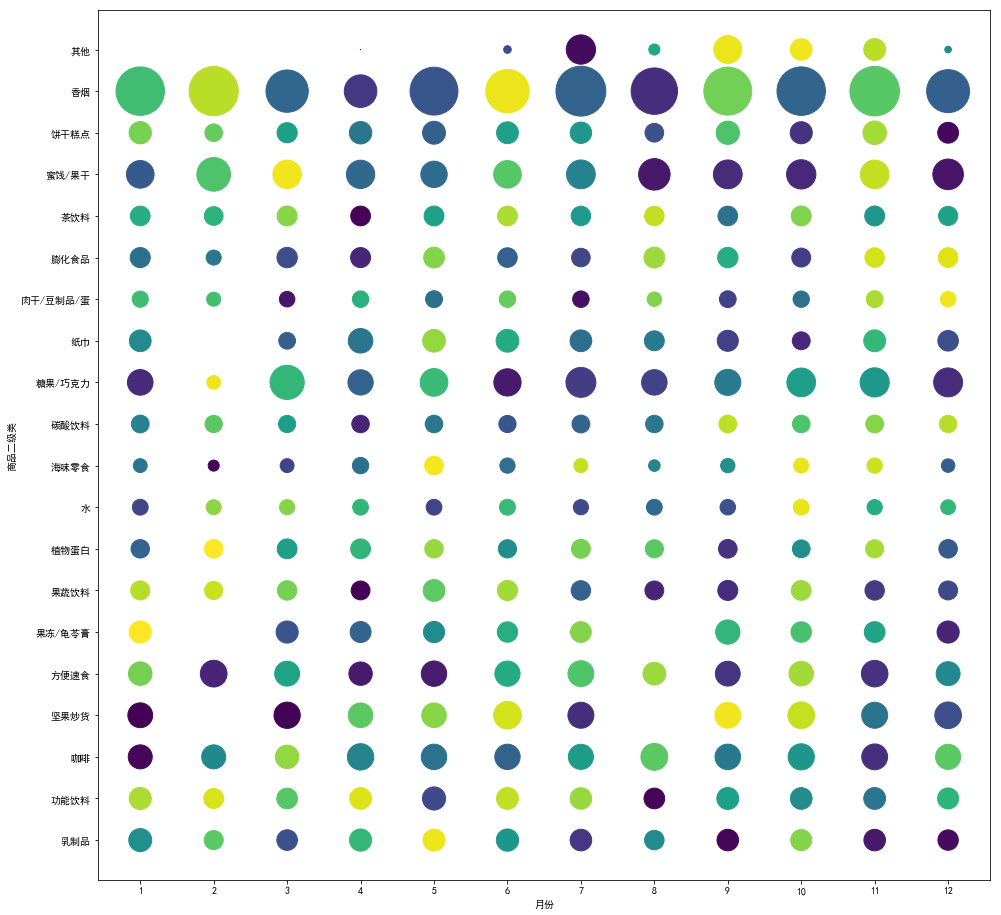

In [153]:
#绘制热力图
colors = np.random.rand(len(x))
plt.figure(figsize = (16,16))
plt.scatter(x,y,s = (z-np.min(z))*100,c = colors)
plt.xticks(range(1,13))
plt.xlabel('月份')
plt.ylabel('商品二级类')
plt.show()

任务五、绘制售货机C 6、7、8月三个月订单量的热力图，横轴以天为单位，纵轴以小时为单位。从热力图可以分析出哪些结论？

In [216]:
def heatmap(month):
    order_C_month = order_C[order_C['月份'] == month]
    order_C_month_group = order_C_month[['订单号','天','小时']].groupby(by = ['天','小时'])
    order_C_count = order_C_month_group.count()
    order_C_count.head()
    order_sta = order_C_count['订单号'].tolist()
    x_label = order_C_count.index.levels[1].tolist()
    y_label = order_C_count.index.levels[0].tolist()
    a = []
    for day in y_label:
        order_count = []
        for hour in x_label:
            try:
                order_count.append(order_C_count.loc[day].loc[hour].订单号)
            except:
                order_count.append(0)
        a.append(order_count) 
    a = pd.DataFrame(a)
    plt.figure(figsize = (10,10))
    sns.heatmap(a, annot=True, vmax=np.max(order_sta),vmin = np.min(order_sta), 
                xticklabels= True, yticklabels= True, square=True, cmap="YlGnBu")
    plt.xlabel('小时')
    plt.ylabel('天')
    str_month = '售货机C:'+str(month)+'月订单量热力图'
    plt.title(str_month)
    plt.show()

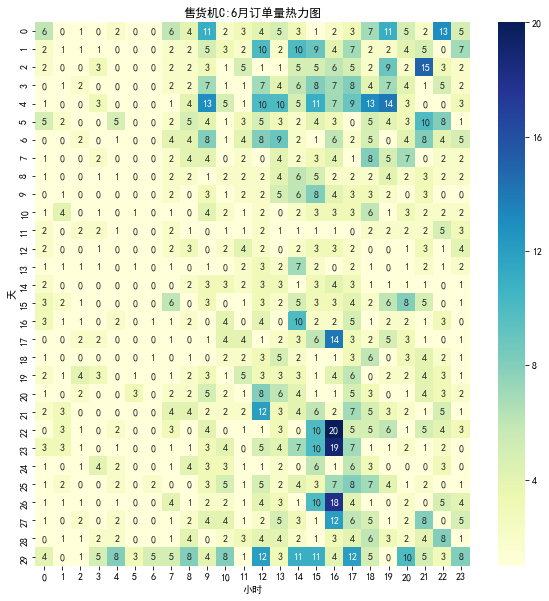

In [217]:
#6月订单热力图
heatmap(6)

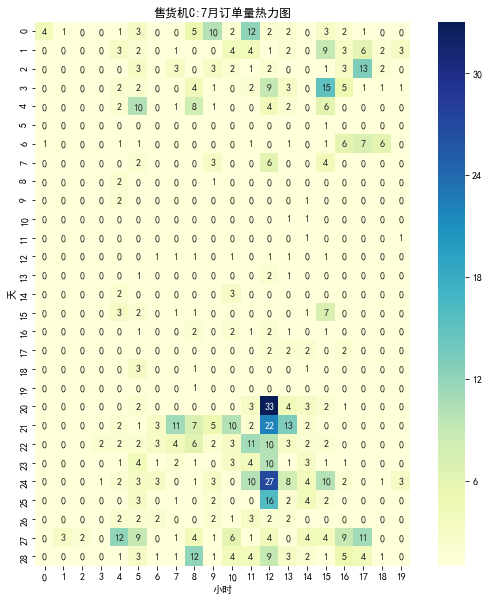

In [218]:
#7月订单热力图
heatmap(7)

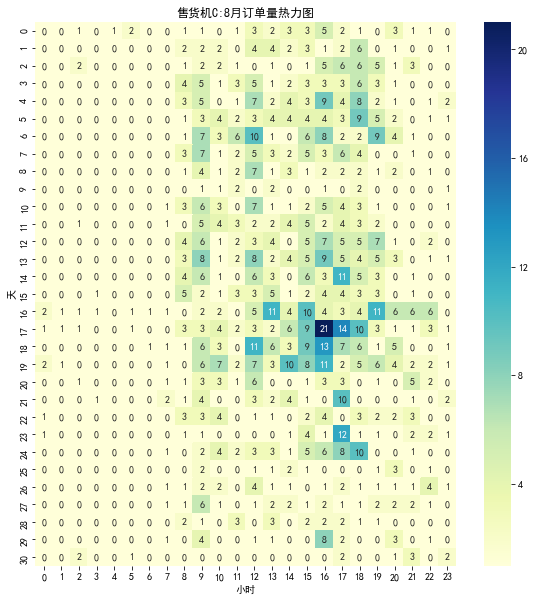

In [219]:
#8月订单热力图
heatmap(8)

结论：

6月订单高峰时段为下旬下午（14-18点）

7月订单高峰时段为下旬中午（10-13点）

8月订单高峰时段为中旬下午（14-18点）